In [1]:
import numpy as np

# Array types and conversions between types
NumPy supports a much greater variety of numerical types than Python does. This section shows which are available, and how to modify an array’s data-type.

The primitive types supported are tied closely to those in C:

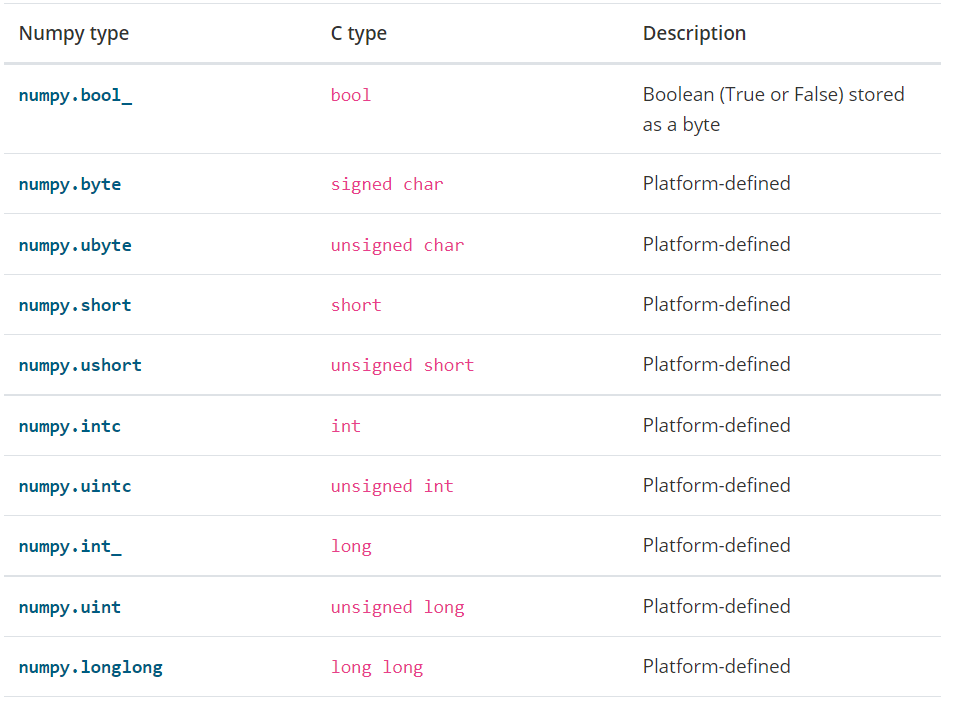
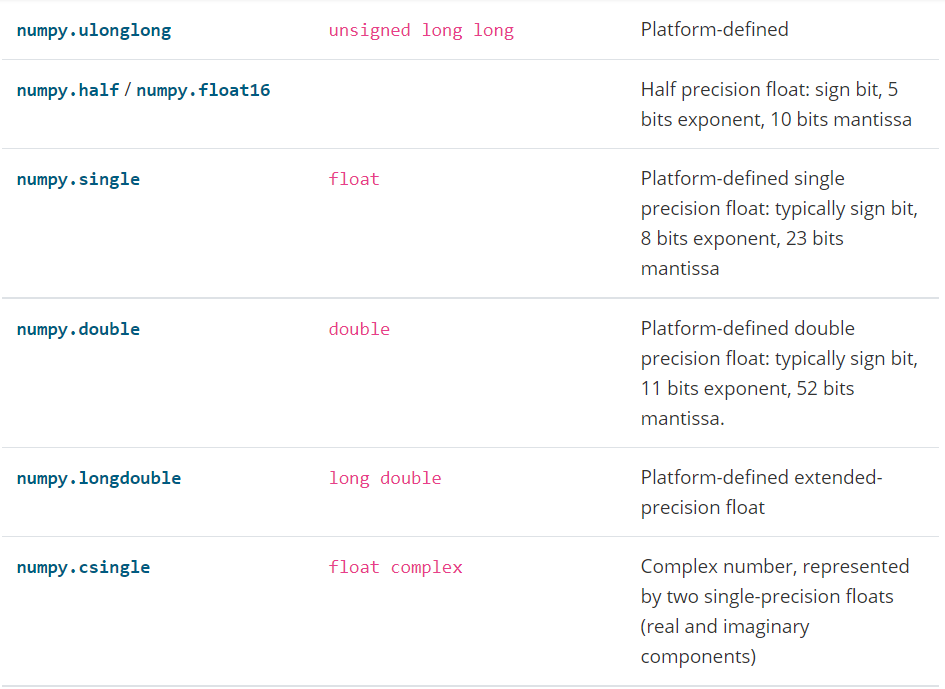
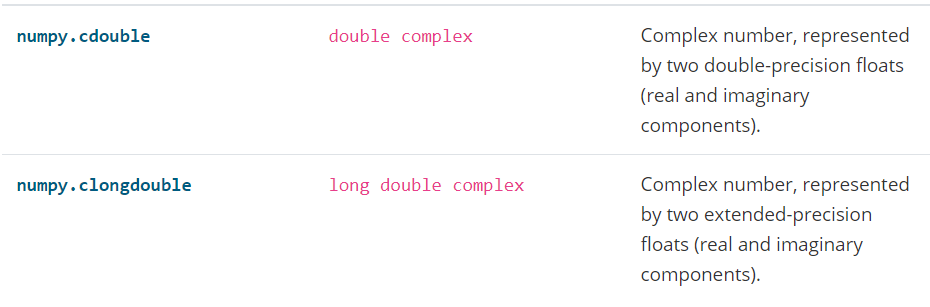

Since many of these have platform-dependent definitions, a set of fixed-size aliases are provided (See Sized aliases).

NumPy numerical types are instances of dtype (data-type) objects, each having unique characteristics. Once you have imported NumPy using
the dtypes are available as np.bool_, np.float32, etc.

Advanced types, not listed above, are explored in section Structured arrays.

There are 5 basic numerical types representing booleans (bool), integers (int), unsigned integers (uint) floating point (float) and complex. Those with numbers in their name indicate the bitsize of the type (i.e. how many bits are needed to represent a single value in memory). Some types, such as int and intp, have differing bitsizes, dependent on the platforms (e.g. 32-bit vs. 64-bit machines). This should be taken into account when interfacing with low-level code (such as C or Fortran) where the raw memory is addressed.

Data-types can be used as functions to convert python numbers to array scalars (see the array scalar section for an explanation), python sequences of numbers to arrays of that type, or as arguments to the dtype keyword that many numpy functions or methods accept. Some examples:

In [2]:
x = np.float32(1.0)
x

1.0

In [3]:
y = np.int_([1,2,4])
y

array([1, 2, 4])

In [4]:
z = np.arange(3, dtype=np.uint8)
z

array([0, 1, 2], dtype=uint8)

Array types can also be referred to by character codes, mostly to retain backward compatibility with older packages such as Numeric. Some documentation may still refer to these, for example:


In [5]:
np.array([1, 2, 3], dtype='f')

array([1., 2., 3.], dtype=float32)

We recommend using dtype objects instead.

To convert the type of an array, use the .astype() method (preferred) or the type itself as a function. For example:

In [6]:
z.astype(float) 
np.int8(z)

array([0, 1, 2], dtype=int8)

Note that, above, we use the Python float object as a dtype. NumPy knows that int refers to np.int_, bool means np.bool_, that float is np.float_ and complex is np.complex_. The other data-types do not have Python equivalents.

To determine the type of an array, look at the dtype attribute:

In [7]:
z.dtype

dtype('uint8')

dtype objects also contain information about the type, such as its bit-width and its byte-order. The data type can also be used indirectly to query properties of the type, such as whether it is an integer:

In [8]:
d = np.dtype(int)
d

dtype('int32')

In [9]:
np.issubdtype(d, np.integer)

True

In [10]:
np.issubdtype(d, np.floating)

False

# Array Scalars
NumPy generally returns elements of arrays as array scalars (a scalar with an associated dtype). Array scalars differ from Python scalars, but for the most part they can be used interchangeably (the primary exception is for versions of Python older than v2.x, where integer array scalars cannot act as indices for lists and tuples). There are some exceptions, such as when code requires very specific attributes of a scalar or when it checks specifically whether a value is a Python scalar. Generally, problems are easily fixed by explicitly converting array scalars to Python scalars, using the corresponding Python type function (e.g., int, float, complex, str, unicode).

The primary advantage of using array scalars is that they preserve the array type (Python may not have a matching scalar type available, e.g. int16). Therefore, the use of array scalars ensures identical behaviour between arrays and scalars, irrespective of whether the value is inside an array or not. NumPy scalars also have many of the same methods arrays do.

# Overflow Errors
The fixed size of NumPy numeric types may cause overflow errors when a value requires more memory than available in the data type. For example, numpy.power evaluates 100 ** 8 correctly for 64-bit integers, but gives 1874919424 (incorrect) for a 32-bit integer.

In [11]:
np.power(100, 8, dtype=np.int64)

10000000000000000

In [12]:
np.power(100, 8, dtype=np.int32)

1874919424

The behaviour of NumPy and Python integer types differs significantly for integer overflows and may confuse users expecting NumPy integers to behave similar to Python’s int. Unlike NumPy, the size of Python’s int is flexible. This means Python integers may expand to accommodate any integer and will not overflow.

NumPy provides numpy.iinfo and numpy.finfo to verify the minimum or maximum values of NumPy integer and floating point values respectively

In [13]:
np.iinfo(int) # Bounds of the default integer on this system.

iinfo(min=-2147483648, max=2147483647, dtype=int32)

In [14]:
np.iinfo(np.int32) # Bounds of a 32-bit integer

iinfo(min=-2147483648, max=2147483647, dtype=int32)

In [15]:
np.iinfo(np.int64) # Bounds of a 64-bit integer

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

If 64-bit integers are still too small the result may be cast to a floating point number. Floating point numbers offer a larger, but inexact, range of possible values.

In [16]:
np.power(100, 100, dtype=np.int64) # Incorrect even with 64-bit int

0

In [17]:
np.power(100, 100, dtype=np.float64)

1e+200

# Extended Precision
Python’s floating-point numbers are usually 64-bit floating-point numbers, nearly equivalent to np.float64. In some unusual situations it may be useful to use floating-point numbers with more precision. Whether this is possible in numpy depends on the hardware and on the development environment: specifically, x86 machines provide hardware floating-point with 80-bit precision, and while most C compilers provide this as their long double type, MSVC (standard for Windows builds) makes long double identical to double (64 bits). NumPy makes the compiler’s long double available as np.longdouble (and np.clongdouble for the complex numbers). You can find out what your numpy provides with np.finfo(np.longdouble).

NumPy does not provide a dtype with more precision than C’s long double\; in particular, the 128-bit IEEE quad precision data type (FORTRAN’s REAL*16\) is not available.

For efficient memory alignment, np.longdouble is usually stored padded with zero bits, either to 96 or 128 bits. Which is more efficient depends on hardware and development environment; typically on 32-bit systems they are padded to 96 bits, while on 64-bit systems they are typically padded to 128 bits. np.longdouble is padded to the system default; np.float96 and np.float128 are provided for users who want specific padding. In spite of the names, np.float96 and np.float128 provide only as much precision as np.longdouble, that is, 80 bits on most x86 machines and 64 bits in standard Windows builds.

Be warned that even if np.longdouble offers more precision than python float, it is easy to lose that extra precision, since python often forces values to pass through float. For example, the % formatting operator requires its arguments to be converted to standard python types, and it is therefore impossible to preserve extended precision even if many decimal places are requested. It can be useful to test your code with the value 1 + np.finfo(np.longdouble).eps.